In [12]:
from matplotlib import pyplot as plt

def display_image(img):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


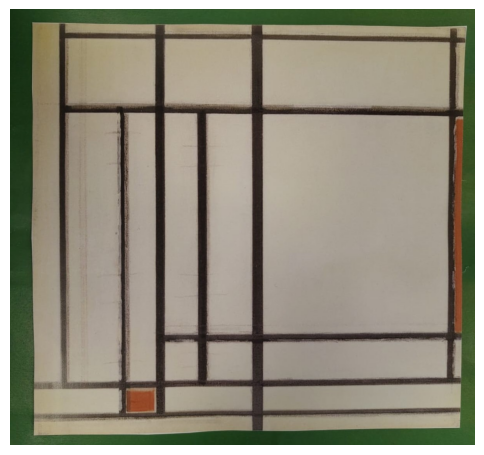

In [13]:
import cv2 as cv

data_path = r'C:\workspace\evml\EVD3\workspace\data\001.jpeg'

img = cv.imread(data_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

display_image(img_rgb)

In [17]:
def maskColor(img, min_hue, max_hue, invert=False):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    light = (min_hue,0,0)
    dark  = (max_hue,255,255)

    mask = cv.inRange(img_hsv, light, dark)
    
    if invert:
        mask = cv.bitwise_not(mask)

    return mask

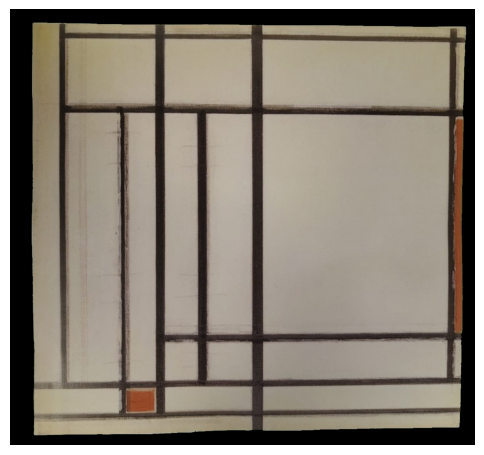

In [19]:
mask = maskColor(img_rgb, 35, 70, True)
masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

display_image(masked_img)

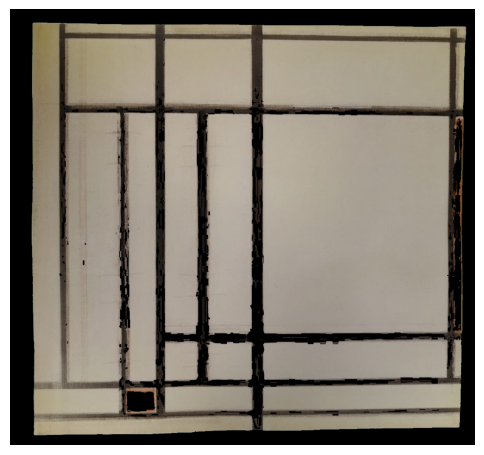

In [20]:
mask_upper = maskColor(img_rgb, 0, 10, False)
mask_lower = maskColor(img_rgb, 170, 180, False)
red_mask = cv.bitwise_or(mask_upper, mask_lower)

not_red_mask = cv.bitwise_not(red_mask)
img_no_red = cv.bitwise_and(masked_img, masked_img, mask=not_red_mask)

display_image(img_no_red)